In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import xml.etree.ElementTree as xet 

In [2]:
df=pd.read_csv('Labels.csv')
df.head()

,filepath,xmin,xmax,ymin,ymax
0,./Images/car-wbs-KL16J3636_00000_jpeg.rf.40a35...,157,327,70,111
1,./Images/254b647f-4cb3-46c3-a206-4e70041f4c78_...,114,220,85,116
2,./Images/car-wbs-MH20BQ20_00000_png.rf.0822012...,160,309,124,157
3,./Images/ba457a81-cf10-4879-8e8f-3a0a8d10689a_...,183,275,204,225
4,./Images/7f768bfc-4c86-4fff-932d-c9871a82dce5_...,237,486,504,591


In [3]:
from glob import glob
path=glob("./Images/*.jpg")

In [4]:
df['filepath'][0]

'./Images/car-wbs-KL16J3636_00000_jpeg.rf.40a353288042807c347854a8ec58bdc5.xml'

<annotation>
	<folder></folder>
	<filename>car-wbs-KL16J3636_00000_jpeg.rf.40a353288042807c347854a8ec58bdc5.jpg</filename>
	<path>car-wbs-KL16J3636_00000_jpeg.rf.40a353288042807c347854a8ec58bdc5.jpg</path>
	<source>
		<database>roboflow.ai</database>
	</source>
	<size>
		<width>518</width>
		<height>285</height>
		<depth>3</depth>
	</size>
	<segmented>0</segmented>
	<object>
		<name>License-Plate</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<occluded>0</occluded>
		<bndbox>
			<xmin>157</xmin>
			<xmax>327</xmax>
			<ymin>70</ymin>
			<ymax>111</ymax>
		</bndbox>
	</object>
</annotation>

I need to extract the image path as well corresponding to the xml one

In [5]:
df['filepath'][0]

'./Images/car-wbs-KL16J3636_00000_jpeg.rf.40a353288042807c347854a8ec58bdc5.xml'

In [6]:
def imagefile(file):
    info=xet.parse(file)
    imagepath=info.getroot().find('filename').text
    imagepath=os.path.join('./Images',imagepath)
    return imagepath

In [7]:
imagefile(df['filepath'][0])

'./Images/car-wbs-KL16J3636_00000_jpeg.rf.40a353288042807c347854a8ec58bdc5.jpg'

In [8]:
imagepath=list(df['filepath'].apply(imagefile))

In [9]:
imagepath

['./Images/car-wbs-KL16J3636_00000_jpeg.rf.40a353288042807c347854a8ec58bdc5.jpg',
 './Images/254b647f-4cb3-46c3-a206-4e70041f4c78___speedex-number-plates-nandanam-chennai-car-number-plate-dealers-33nu2i6-jpg_jpeg.rf.239a7688b78dfb168ac477bd9a02bac8.jpg',
 './Images/car-wbs-MH20BQ20_00000_png.rf.08220126c86307f6891b4f72b56585b2.jpg',
 './Images/ba457a81-cf10-4879-8e8f-3a0a8d10689a___3e7fd381-0ae5-4421-8a70-279ee0ec1c61_hqdefault_jpg.rf.dcf62ad02c4767f079e98585c697b0d8.jpg',
 './Images/7f768bfc-4c86-4fff-932d-c9871a82dce5___1431955d1446017445-number-plates-merchandise-canvas-ink-gurgaon-edit-closed-thumb_img_4422_1024-jpg_jpeg.rf.50b87e765556851faf614ea607c6abbb.jpg',
 './Images/car-wbs-KL60N5344_00001_jpeg.rf.6abf4c26b7132e73446ba33227bd4661.jpg',
 './Images/9cad4b47-6c7b-4e30-ab55-b7fa040beb56___135717d1400912281-skoda-rapid-1-6tdi-cr-mt-elegance-ultima-candy-white-white-monster-_mg_2993comp-jpg_jpeg.rf.8d38f739891fada2606f5f403c410de7.jpg',
 './Images/car-wbs-TN74F3339_00000_jpeg.rf.f

In [34]:
len(imagepath)

300

Displaying image from the image path and checking if the co-ordinates are found correctly, by extracting the part of the image with the coordinates

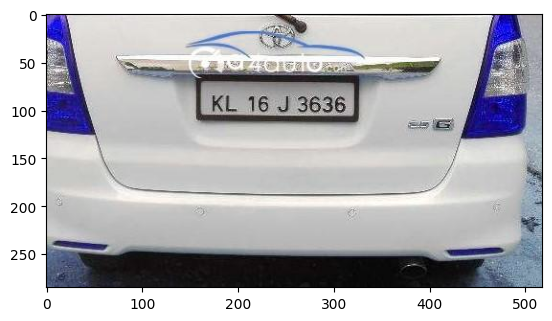

In [11]:
image_path=imagepath[0]
image=cv2.imread(image_path)
plt.imshow(image)

Highlighting the co-ordinates

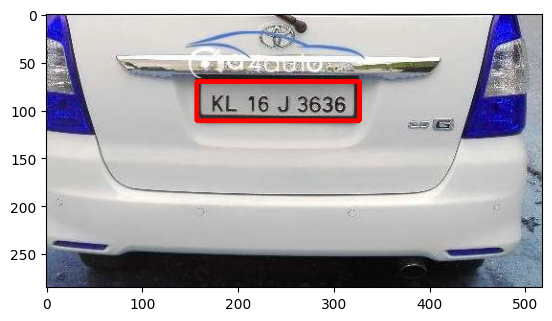

In [14]:
plate=cv2.rectangle(image,(df['xmin'][0],df['ymin'][0]),(df['xmax'][0],df['ymax'][0]),(255,0,0),3)
plt.imshow(plate)

We can clearly see that the co-ordinates are matching to the number plate

**Data Preprocessing**

In [17]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from sklearn.model_selection import train_test_split


Extracting the required values which is the co-ordinates

In [19]:
df.iloc[:,1:]

,xmin,xmax,ymin,ymax
0,157,327,70,111
1,114,220,85,116
2,160,309,124,157
3,183,275,204,225
4,237,486,504,591
...,...,...,...,...
295,317,478,257,302
296,121,461,170,230
297,108,232,180,211
298,31,179,153,202


Converting it to array

In [20]:
labels=df.iloc[:,1:].values
labels

array([[157, 327,  70, 111],
       [114, 220,  85, 116],
       [160, 309, 124, 157],
       ...,
       [108, 232, 180, 211],
       [ 31, 179, 153, 202],
       [143, 305, 164, 208]])

For training all the images should be of same size so we are going with 224*224
We are normalizing the labels and pixel values 
Pixel value range 0-255. We divide by 255

In [25]:
ind=0
image=imagepath[ind]
image_array=cv2.imread(image)
height,width,depth=image_array.shape
height,width,depth

#Fixing size of image and normalizing it
load_image=load_img(image,target_size=(224,224))
load_image_arr=img_to_array(load_image) 
norm_load_image_arr=load_image_arr/255.0

#Normalizing the labels
xmin,xmax,ymin,ymax=labels[ind]
nxmin,nxmax=xmin/width,xmax/width
nymin,nymax=ymin/height,ymax/height
normlabel=(nxmin,nxmax,nymin,nymax)
normlabel

(0.3030888030888031,
 0.6312741312741312,
 0.24561403508771928,
 0.3894736842105263)

In [26]:
norm_load_image_arr

array([[[0.87058824, 0.29803923, 0.4745098 ],
        [0.6901961 , 0.3137255 , 0.42352942],
        [0.6901961 , 0.4509804 , 0.50980395],
        ...,
        [0.68235296, 0.6745098 , 0.6784314 ],
        [0.6784314 , 0.67058825, 0.6745098 ],
        [0.68235296, 0.6745098 , 0.6784314 ]],

       [[0.89411765, 0.34117648, 0.50980395],
        [0.6509804 , 0.28235295, 0.38431373],
        [0.6745098 , 0.43137255, 0.48235294],
        ...,
        [0.67058825, 0.6627451 , 0.6666667 ],
        [0.6745098 , 0.6666667 , 0.67058825],
        [0.6784314 , 0.67058825, 0.6745098 ]],

       [[0.85490197, 0.36078432, 0.5058824 ],
        [0.6862745 , 0.32156864, 0.40392157],
        [0.7176471 , 0.41960785, 0.46666667],
        ...,
        [0.654902  , 0.64705884, 0.6509804 ],
        [0.67058825, 0.6627451 , 0.6666667 ],
        [0.6784314 , 0.67058825, 0.6745098 ]],

       ...,

       [[0.49019608, 0.3647059 , 0.30588236],
        [0.45490196, 0.32941177, 0.2784314 ],
        [0.5411765 , 0

In [43]:
no_of_images=len(imagepath)

In [52]:
normalized_images=[]
normalized_labels=[]
for ind in range(no_of_images):
    image=imagepath[ind]
    image_array=cv2.imread(image)
    height,width,depth=image_array.shape
    height,width,depth

    #Fixing size of image and normalizing it
    load_image=load_img(image,target_size=(224,224))
    load_image_arr=img_to_array(load_image) 
    norm_load_image_arr=load_image_arr/255.0
    normalized_images.append(norm_load_image_arr)

    #Normalizing the labels
    xmin,xmax,ymin,ymax=labels[ind]
    nxmin,nxmax=xmin/width,xmax/width
    nymin,nymax=ymin/height,ymax/height
    normlabel=(nxmin,nxmax,nymin,nymax)
    normalized_labels.append(normlabel)

In [45]:
len(normalized_images)

300

In [46]:
normalized_images[0]

array([[[0.87058824, 0.29803923, 0.4745098 ],
        [0.6901961 , 0.3137255 , 0.42352942],
        [0.6901961 , 0.4509804 , 0.50980395],
        ...,
        [0.68235296, 0.6745098 , 0.6784314 ],
        [0.6784314 , 0.67058825, 0.6745098 ],
        [0.68235296, 0.6745098 , 0.6784314 ]],

       [[0.89411765, 0.34117648, 0.50980395],
        [0.6509804 , 0.28235295, 0.38431373],
        [0.6745098 , 0.43137255, 0.48235294],
        ...,
        [0.67058825, 0.6627451 , 0.6666667 ],
        [0.6745098 , 0.6666667 , 0.67058825],
        [0.6784314 , 0.67058825, 0.6745098 ]],

       [[0.85490197, 0.36078432, 0.5058824 ],
        [0.6862745 , 0.32156864, 0.40392157],
        [0.7176471 , 0.41960785, 0.46666667],
        ...,
        [0.654902  , 0.64705884, 0.6509804 ],
        [0.67058825, 0.6627451 , 0.6666667 ],
        [0.6784314 , 0.67058825, 0.6745098 ]],

       ...,

       [[0.49019608, 0.3647059 , 0.30588236],
        [0.45490196, 0.32941177, 0.2784314 ],
        [0.5411765 , 0

In [47]:
normalized_labels[0]

(0.3030888030888031,
 0.6312741312741312,
 0.24561403508771928,
 0.3894736842105263)

Converting list into numpy array for easier computation

In [48]:
normalized_labels=np.array(normalized_labels,dtype=np.float64)
normalized_images=np.array(normalized_images,dtype=np.float64)

Now we are trying to build a model which gives us the co-ordinates of the number plate when an image is given
So are X is images and y is the labels

In [49]:
X=normalized_images
y=normalized_labels

In [50]:
print(X.shape,y.shape)

(300, 224, 224, 3) (300, 4)


Performing Train Test Split